In [1]:
# Import all necessary modules.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [2]:
# reset PN sequence generator.
seed = 42
np.random.seed(seed)

### Gerando o conjunto de dados.

In [3]:
# Number of examples.
N = 1000

# Create the dataset.
X, y = make_circles(n_samples=N, factor=.5, noise=.05)

# Number of classes.
numberOfClasses = 2

### Plotando as classes.

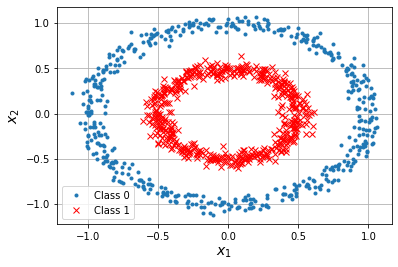

In [4]:
# Plot the dataset.
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

### Dividindo o conjunto em conjuntos de treinamento e validação.

In [5]:
# Split array into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

### Validação cruzada para encontrar a ordem ótima.

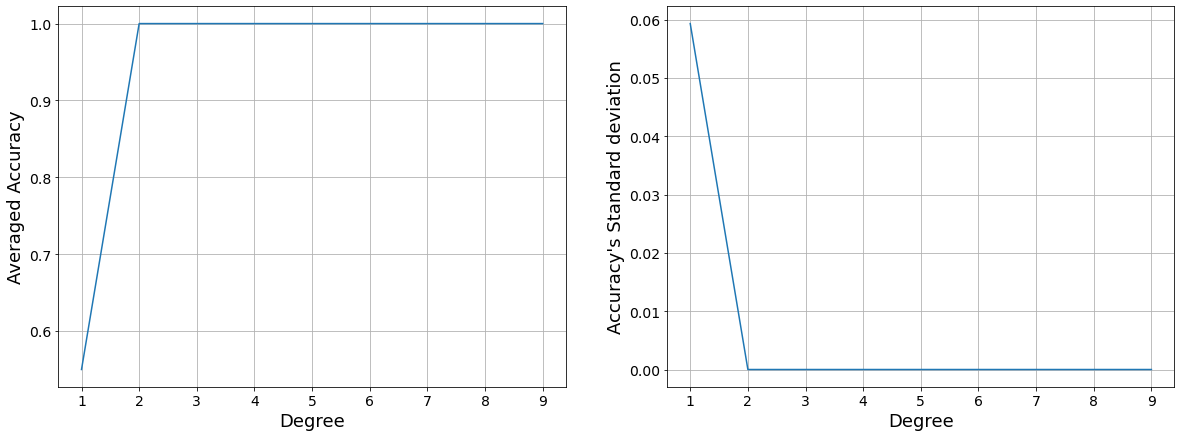

In [8]:
# Since we have the bias term, then we let the classifier find its value. 
include_bias = True

# Maximum degree to be tested.
maxDegree = 10

# Number of folds.
k = 10
# Instantiate the k-Fold object.
kfold = KFold(n_splits=k, shuffle=True, random_state=seed)

# Iterate over the possible polynomial orders.
kfold_mean_vec = []
kfold_std_vec = []
for order in range(1,maxDegree):

    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=order, include_bias=include_bias)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a binary classifier.
    clf = LogisticRegression(random_state=seed)

    # Create a pipeline of actions.
    model = Pipeline([
        ('poly', poly), 
        ('scaler', scaler),
        ('clf', clf)
    ])
    
    # Cross-validation with k-Fold.
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kfold)

    # Storing the scores.
    kfold_mean_vec.append(scores.mean())
    kfold_std_vec.append(scores.std())

# Plot the results.
plt.figure(figsize=(20, 7))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1,maxDegree), kfold_mean_vec)
plt.ylabel('Averaged Accuracy', fontsize=18)
plt.xlabel('Degree', fontsize=18)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.subplot(1, 2, 2)
plt.plot(range(1,maxDegree), kfold_std_vec)
plt.ylabel('Accuracy\'s Standard deviation', fontsize=18)
plt.xlabel('Degree', fontsize=18)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

### Acurácia com ordem ótima.

Como todos os polinômios com ordem maior ou igual a dois resultam em uma acurácia de 100%, então, seguindo o princípio da navalha de Occam, escolhemos um polinômio de ordem dois, pois ele é o polinômio com menor complexidade e que classifica o conjunto de dados perfeitamente.

In [9]:
include_bias = True

# Instantiate a polynomial.
poly = PolynomialFeatures(degree=2, include_bias=include_bias)
# Instantiate a scaler.
scaler = StandardScaler()
# Instantiate a binary classifier.
clf = LogisticRegression(random_state=seed)

# Create a pipeline of actions.
model = Pipeline([
    ('poly', poly), 
    ('scaler', scaler),
    ('clf', clf)
])

# Train the model.
model.fit(X_train, y_train)

# Prediction.
y_pred = model.predict(X_test)

# Measure the model's accuracy.
acc = accuracy_score(y_test, y_pred)
print('Accuracy of Logistic Regression model is: %1.2f %%' % (acc*100))

Accuracy of Logistic Regression model is: 100.00 %


### Plotando as regiões de decisão.

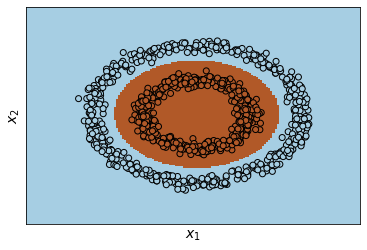

In [10]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Plotando a matriz de confusão.

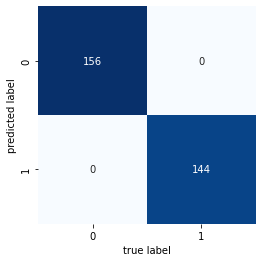

In [11]:
# Plot the confusion matrix.
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(numberOfClasses), yticklabels=range(numberOfClasses), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Gerando o reporte de classificação.

In [19]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       156
           1     1.0000    1.0000    1.0000       144

    accuracy                         1.0000       300
   macro avg     1.0000    1.0000    1.0000       300
weighted avg     1.0000    1.0000    1.0000       300

